# Analyzing and Predicting Facebook Post Engagement

### Project Structure
1. Project Question and Dataset Description
2. Loading and viewing dataset
3. Pre-processing
4. Exploratory Data Analysis
5. Modeling 
    - Outlier removal and re-shaping dataframe
    - Linear Regression
    - Random Forest Regression
6. Take-aways
7. References

Data comes via the UCI dataset: https://archive.ics.uci.edu/ml/datasets/Facebook+metrics

## 1. Question: Which posts have the highest engagement, and can we predict which posts will get higher engagement?
#### Assumptions:
- higher Facebook engagement leads to more downloads and overall engagement with the app
- There have been no changes in FB's feed algorithm since the data was posted (it has been already)

#### Dataset info
##### Variables
- Page total likes: how many likes the page had when post went live
- Type: what kind of post (video, link, status, photo)
- Category: not sure, 3 levels
- Post Month
- Post Weekday
- Post Hour
- Paid
- like
- share
- comment
- total interactions
- Post metrics (recorded after posting, EDA only)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Loading and Viewing the data

In [4]:
df = pd.read_csv("dataset_Facebook.csv",delimiter=';')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
Page total likes                                                       500 non-null int64
Type                                                                   500 non-null object
Category                                                               500 non-null int64
Post Month                                                             500 non-null int64
Post Weekday                                                           500 non-null int64
Post Hour                                                              500 non-null int64
Paid                                                                   499 non-null float64
Lifetime Post Total Reach                                              500 non-null int64
Lifetime Post Total Impressions                                        500 non-null int64
Lifetime Engaged Users                                                 500 non-nul

In [6]:
df.head(3)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80


Because columns 7 to 15 ("Lifetime post total impressions","Lifetime Engaged users", etc.) are recorded after posting, they will not be used for modeling. However, they can give useful information about post reach, and we will be looking at them in EDA.

In [766]:

#df.drop(df.columns[7:15],
#        axis=1,inplace=True)

We need to fill the values that are blank with 0:

Goal: predict Total Interactions based on features

I have excluded comment, like, and share and instead focused on Total Interactions, which is what we will be modeling for. 

An outlier is easily visible for total interactions, at around 6000. 

### Pre-processing

In [827]:
df['like'].describe()

count     499.000000
mean      177.945892
std       323.398742
min         0.000000
25%        56.500000
50%       101.000000
75%       187.500000
max      5172.000000
Name: like, dtype: float64

In [828]:
df['Type'].value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

In [7]:
df['Paid'].value_counts()
df['like'].fillna(0,inplace=True)
df['share'].fillna(0,inplace=True)
df['Paid'].fillna(0,inplace=True)

In [62]:
#df.drop(df.columns[1],axis=1,inplace = True)

## EDA

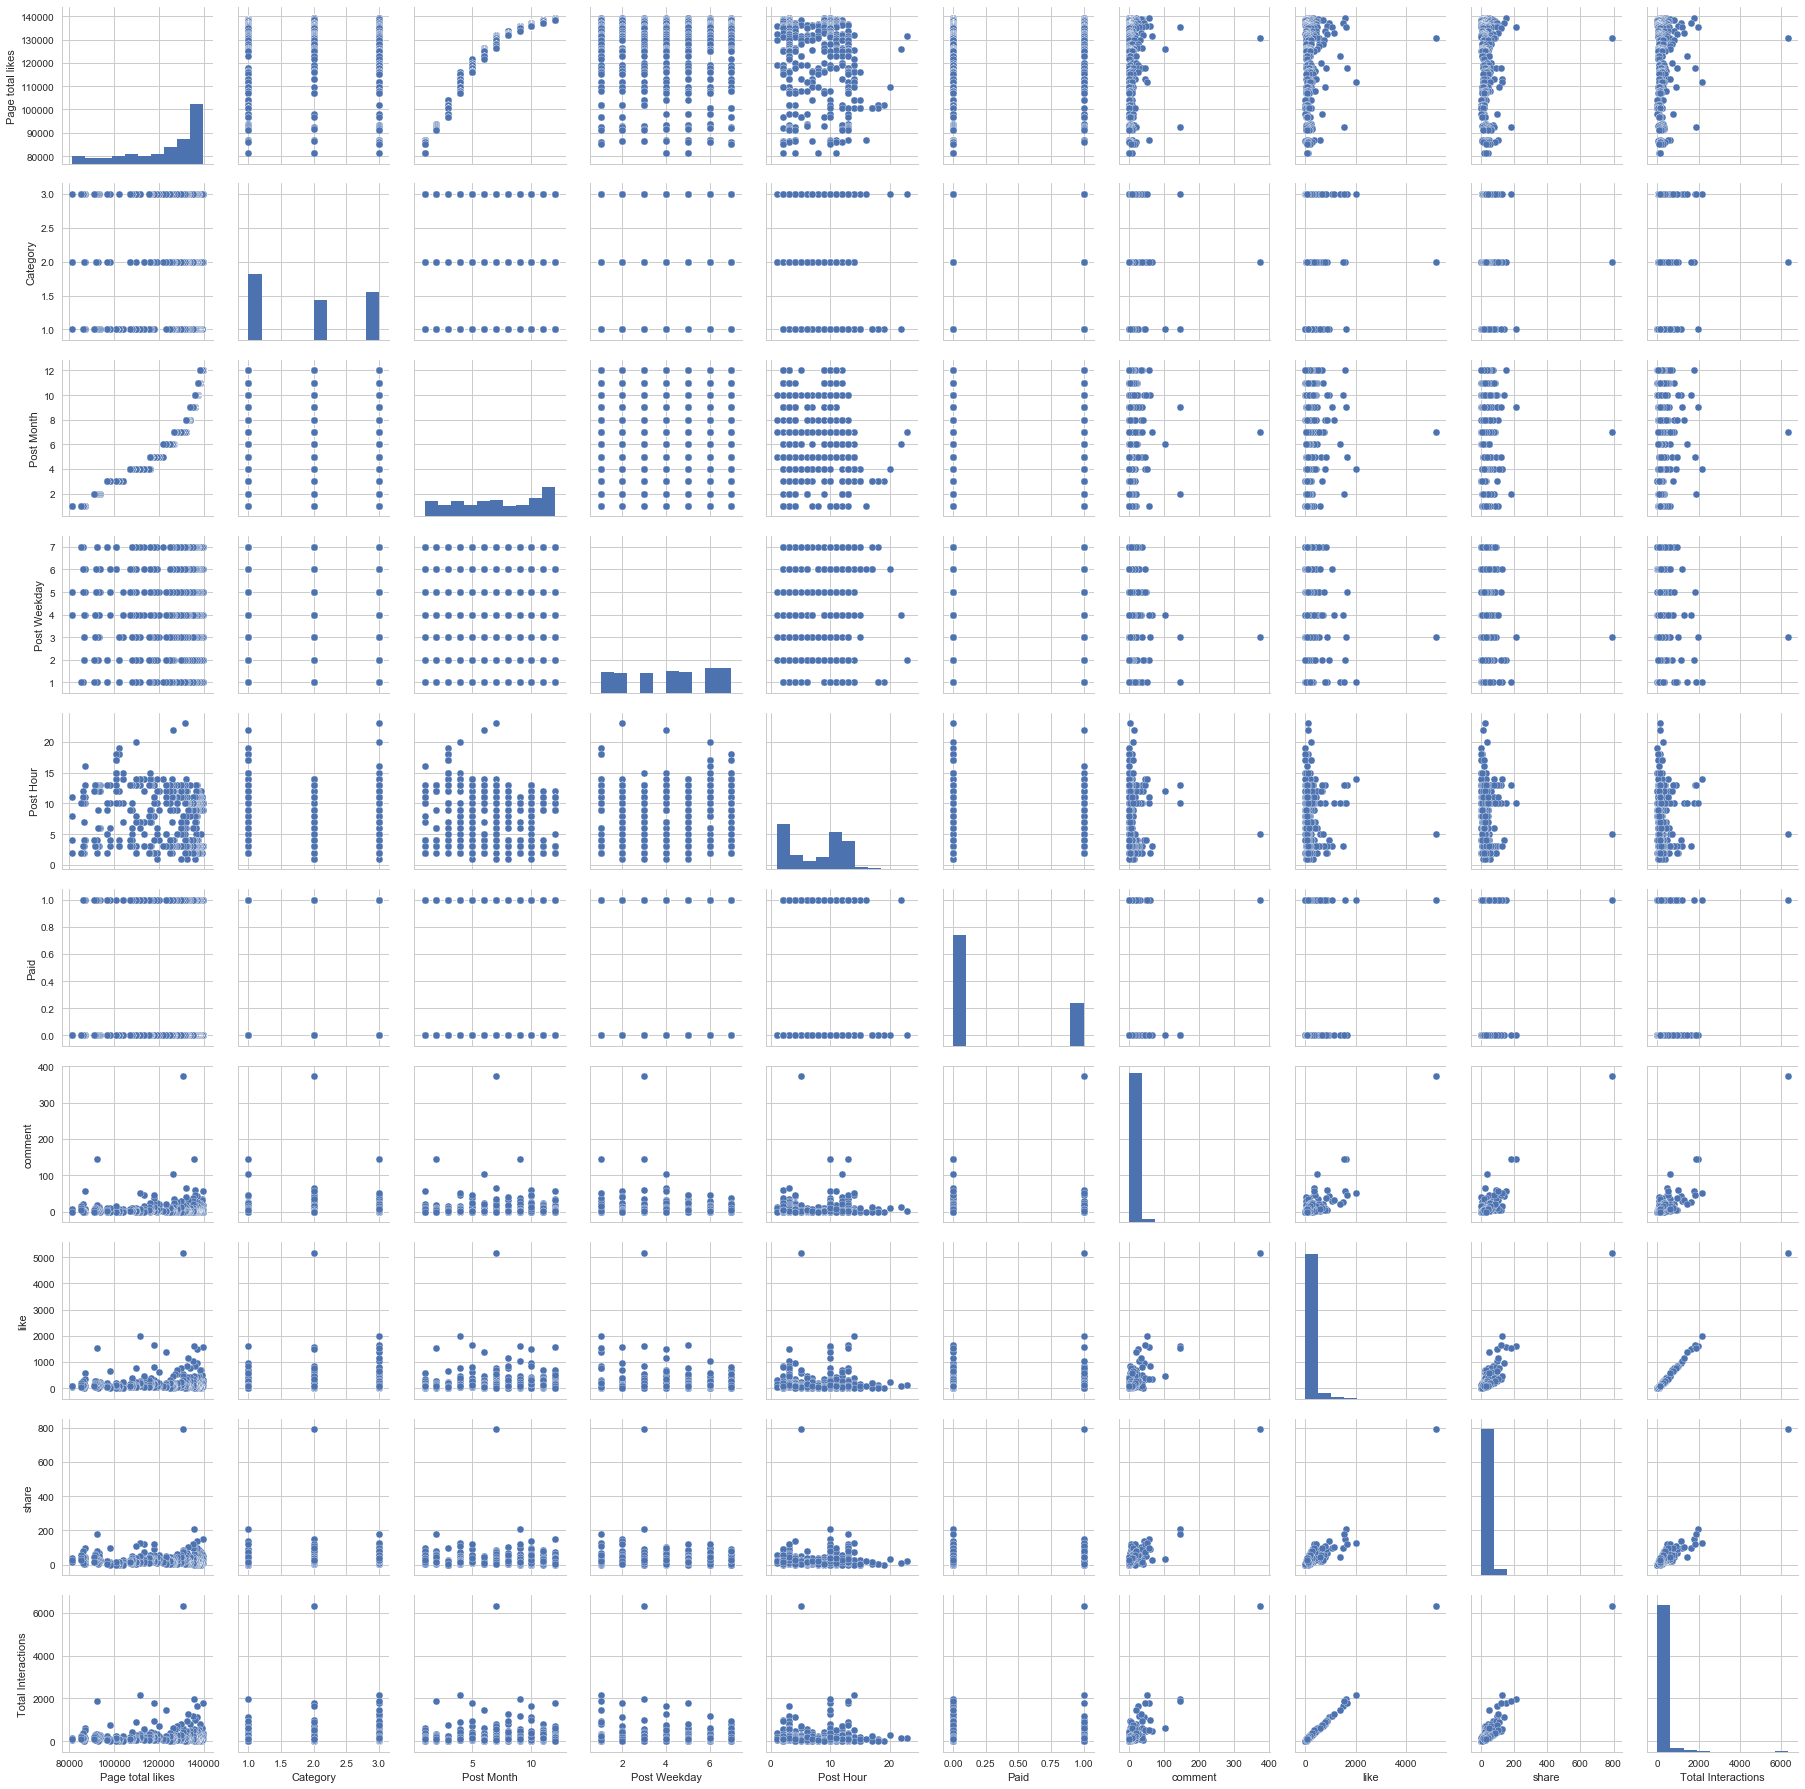

In [831]:
df['Type'] = df['Type'].apply(lambda x: str(x))
plotdf = df.drop(df.columns[7:15],axis =1)
sns.pairplot(data=plotdf)

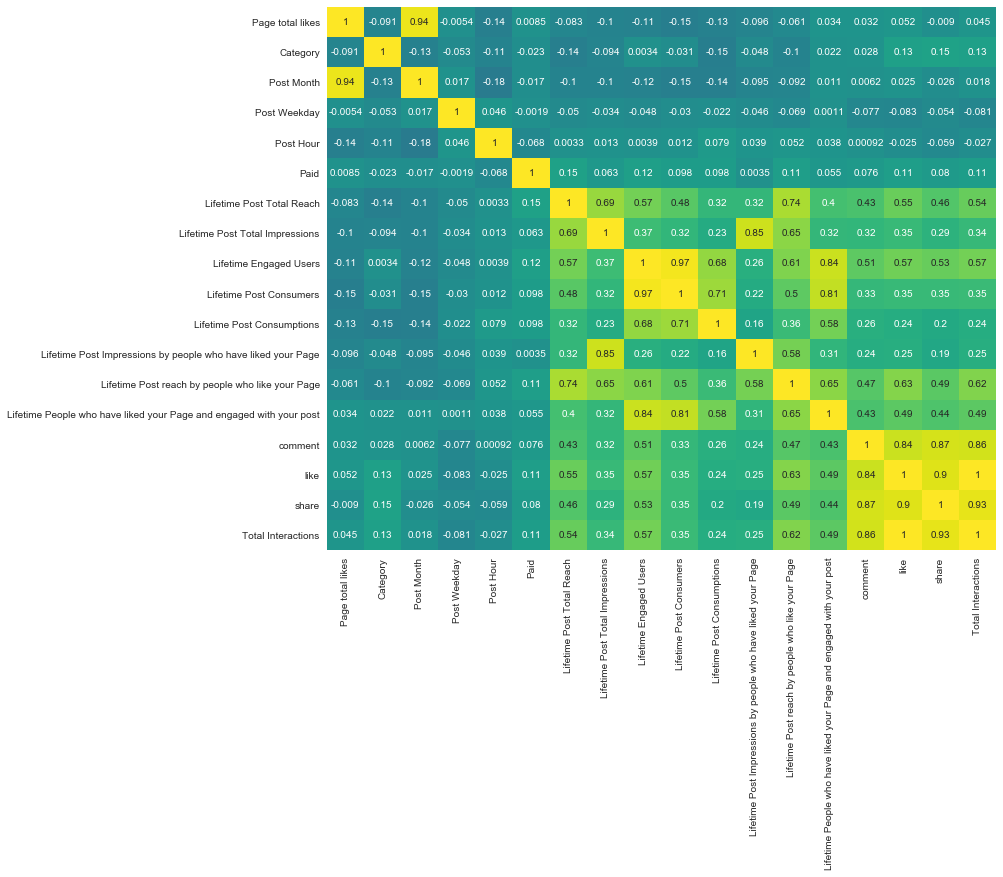

In [837]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='viridis',annot=True,cbar=False)

#### Univariate- Page Likes and Post Likes

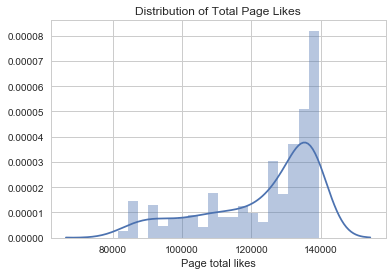

In [851]:
sns.distplot(df['Page total likes'],bins=20)
plt.title("Distribution of Total Page Likes")

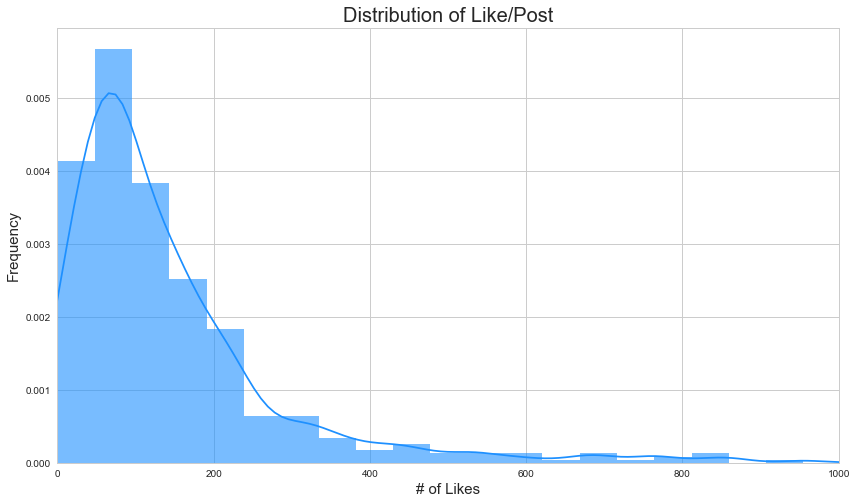

In [838]:
plt.figure(figsize=(14,8))
sns.distplot(df[df['like']<1000]['like'],bins=20,color='dodgerblue',hist_kws={'alpha':0.6})
plt.xlim(0,1000)
plt.xlabel("# of Likes",fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution of Like/Post',fontsize=20)
#plt.savefig('NumLikes.png', bbox_inches='tight')

#### Analysis of TIme Categories

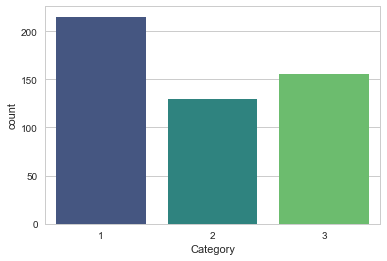

In [839]:
sns.countplot(df['Category'],palette='viridis')

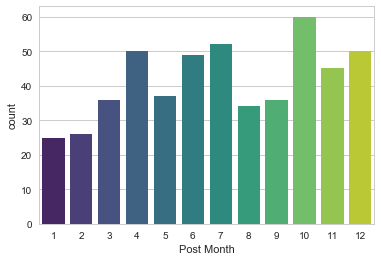

In [840]:
sns.countplot(df['Post Month'],palette='viridis')
#plt.savefig('monthCount.png', bbox_inches='tight')

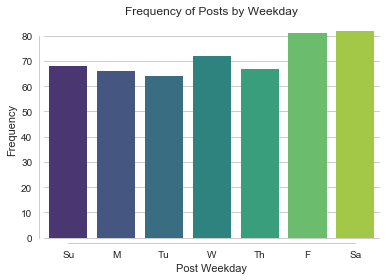

In [841]:
from collections import OrderedDict
sns.set_style("whitegrid")

f, ax = plt.subplots()
sns.countplot(df['Post Weekday'],palette='viridis')
handles = ["Su", "M", "Tu", "W", "Th", "F",'Sa']
labels = [0,1,2,3,4,5,6]
plt.xticks(labels, handles)
ax.set_ylabel("Frequency")
sns.despine(offset = 5, trim = True)
plt.title("Frequency of Posts by Weekday")
#plt.savefig('dayCount.png', bbox_inches='tight')

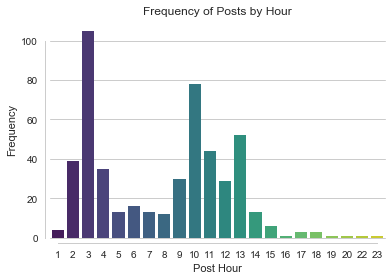

In [842]:
sns.set_style("whitegrid")

f, ax = plt.subplots()
sns.countplot(df['Post Hour'],palette='viridis',)
#handles = ["Su", "M", "Tu", "W", "Th", "F",'Sa']
#labels = [0,1,2,3,4,5,6]
#plt.xticks(labels, handles)
ax.set_ylabel("Frequency")
sns.despine(offset = 5, trim = True)
plt.title("Frequency of Posts by Hour")
#plt.savefig('hourCount.png', bbox_inches='tight')

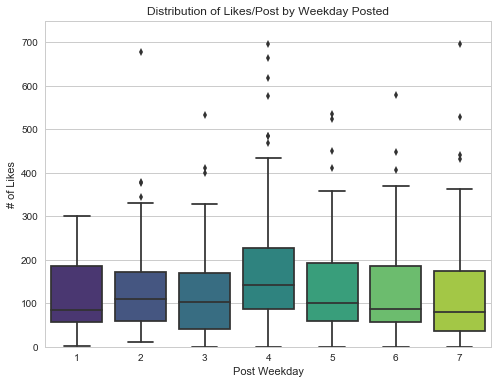

In [843]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Post Weekday',y='like',data=df,palette='viridis')
plt.ylim(0,750)
plt.title("Distribution of Likes/Post by Weekday Posted")
plt.ylabel("# of Likes")
#plt.savefig('dayBox.png', bbox_inches='tight')

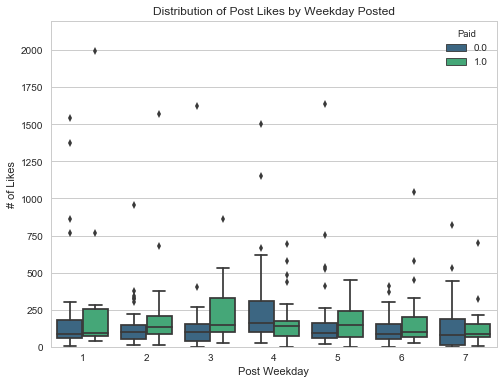

In [312]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Post Weekday',y='like',hue='Paid',data=df,palette='viridis')
plt.ylim(0,2200)
plt.title("Distribution of Post Likes by Weekday Posted")
plt.ylabel("# of Likes")


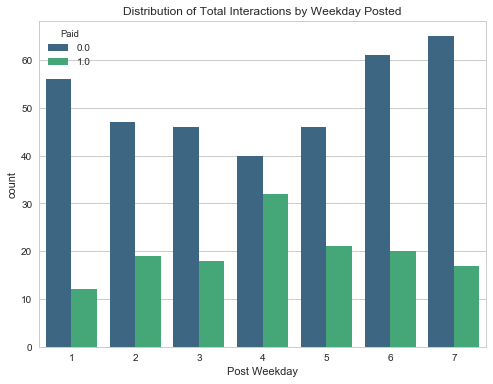

In [301]:
plt.figure(figsize=(8,6))
sns.countplot(x='Post Weekday',hue='Paid',data=df,palette='viridis')
plt.title("Distribution of Total Interactions by Weekday Posted")

Facebook uses their own prestoDB, where the Day of the week (1-7), where Sunday is the first day of the week.


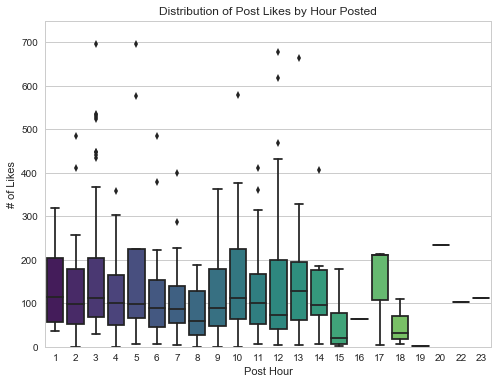

In [692]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Post Hour',y='like',data=df,palette='viridis')
plt.ylim(0,750)
plt.title("Distribution of Post Likes by Hour Posted")
plt.ylabel("# of Likes")
plt.savefig('hourBox.png', bbox_inches='tight')

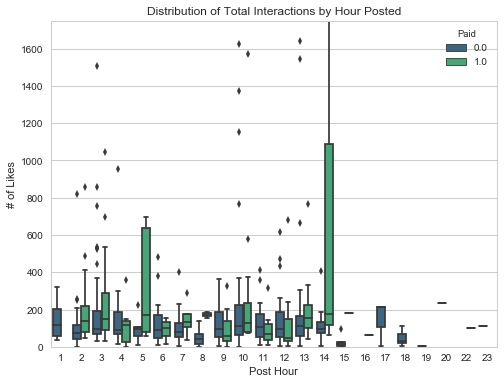

In [311]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Post Hour',y='like',hue='Paid',data=df,palette='viridis')
plt.ylim(0,1750)
plt.title("Distribution of Total Interactions by Hour Posted")
plt.ylabel("# of Likes")

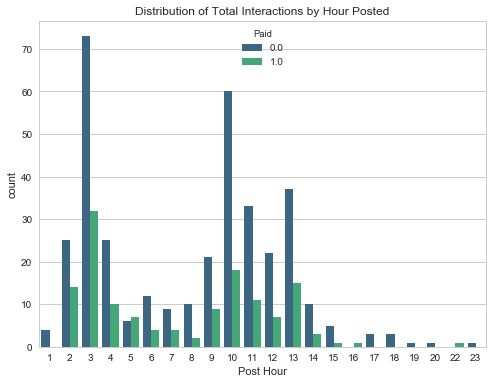

In [298]:
plt.figure(figsize=(8,6))
sns.countplot(x='Post Hour',hue='Paid',data=df,palette='viridis')
#plt.ylim(0,2200)
plt.title("Distribution of Total Interactions by Hour Posted")

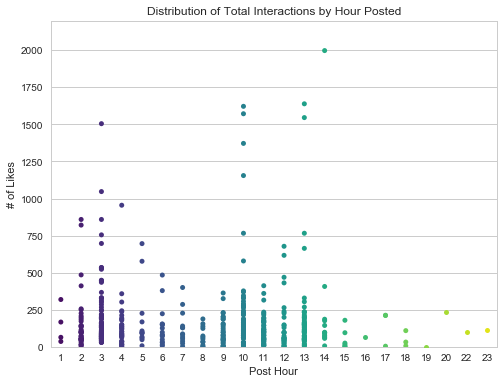

In [308]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Post Hour',y='like',data=df,palette='viridis')
plt.ylim(0,2200)
plt.title("Distribution of Total Interactions by Hour Posted")
plt.ylabel("# of Likes")

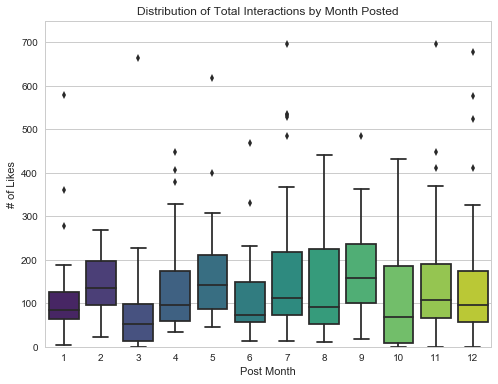

In [694]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Post Month',y='like',data=df,palette='viridis')
plt.ylim(0,750)
plt.title("Distribution of Total Interactions by Month Posted")
plt.ylabel("# of Likes")
plt.savefig('monthBox.png', bbox_inches='tight')

When did the majority of posts go live?

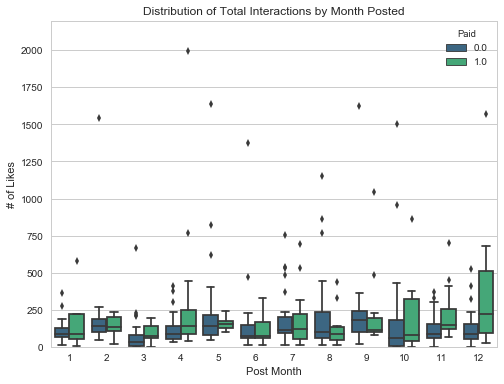

In [322]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Post Month',y='like',hue='Paid',data=df,palette='viridis')
plt.ylim(0,2200)
plt.title("Distribution of Total Interactions by Month Posted")
plt.ylabel("# of Likes")

#### Total Page Likes vs. Post likes

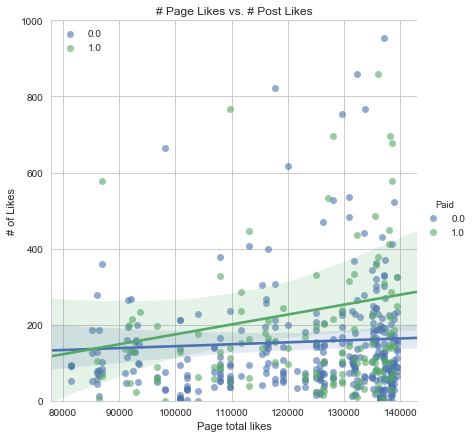

In [847]:
sns.lmplot(x='Page total likes',y='like',
           hue='Paid',data=df,fit_reg=True,
          scatter_kws={'alpha':0.6},size=(6))
plt.legend()
plt.ylim(0,1000)
plt.ylabel("# of Likes")
plt.title('# Page Likes vs. # Post Likes')
#plt.savefig('pageLikeScatter.png', bbox_inches='tight')

Does the number of likes per post increase as the total page like increases? It depends. There is a weak positive trend for paid posts but no increase in non-paid posts.

#### Category vs. Likes

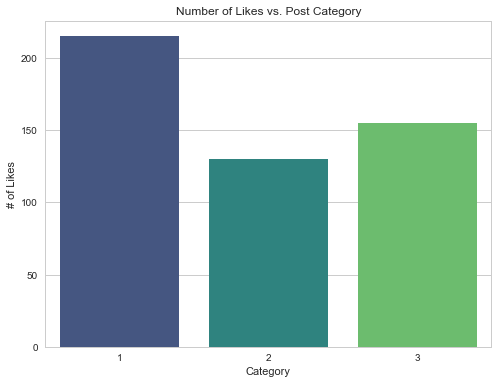

In [848]:
plt.figure(figsize=(8,6))
sns.countplot(x='Category',data=df,palette='viridis')
plt.ylabel("# of Likes")
plt.title("Number of Likes vs. Post Category")
plt.savefig('catCount.png', bbox_inches='tight')

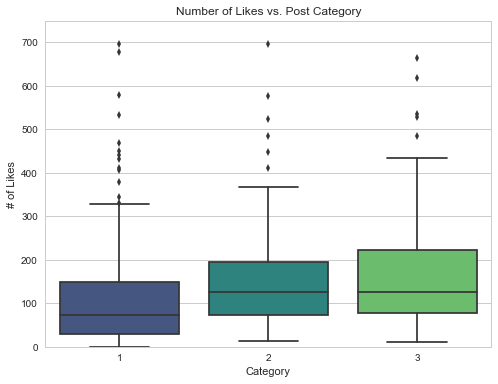

In [849]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Category',y='like',data=df,palette='viridis')
plt.ylim(0,750)
plt.ylabel("# of Likes")
plt.title("Number of Likes vs. Post Category")
plt.savefig('catBox.png', bbox_inches='tight')

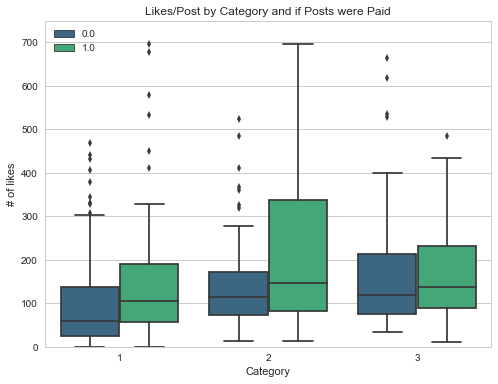

In [706]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Category',y='like',data=df,hue='Paid',palette='viridis')
plt.ylim(0,750)
plt.ylabel("# of likes")
plt.legend(loc='upper left')
plt.title("Likes/Post by Category and if Posts were Paid")
plt.savefig('catPaidCount.png', bbox_inches='tight')


Observations:

- Categories 2 and 3 peformed similarly, while Category 1 performed the worst
- The most posts were of category 1 posts
- Paid Category 1 posts saw the largest increase, followed by 2 and then 3. 


#### Post Type vs. Likes

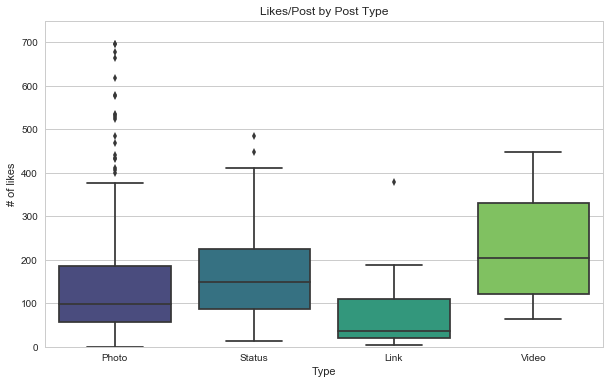

In [708]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Type',y='like',data=df,palette='viridis')
plt.ylim(0,750)
#sns.despine(offset=4,bottom=True)
plt.title("Likes/Post by Post Type")
plt.ylabel("# of likes")
#plt.legend(loc='upper left')
plt.savefig('typeBox.png', bbox_inches='tight')


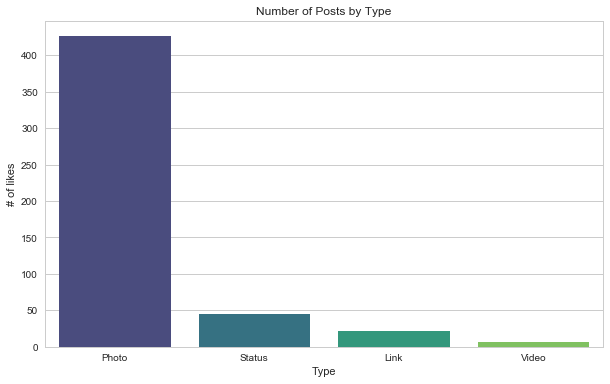

In [715]:
plt.figure(figsize=(10,6))
sns.countplot(x='Type',data=df,palette='viridis')
#plt.ylim(0,750)
#sns.despine(offset=4,bottom=True)
plt.title("Number of Posts by Type")
plt.ylabel("# of likes")
#plt.legend(loc='upper left')
plt.savefig('typeCount.png', bbox_inches='tight')


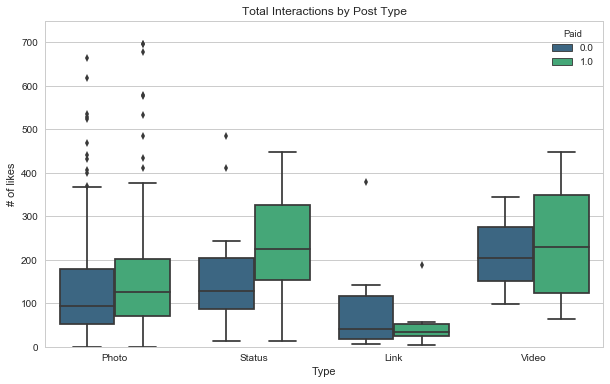

In [709]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Type',y='like',hue='Paid',data=df,palette='viridis')
plt.ylim(0,750)
#sns.despine(offset=4,bottom=True)
plt.title("Total Interactions by Post Type")
plt.ylabel("# of likes")
plt.savefig('typePaidBox.png', bbox_inches='tight')

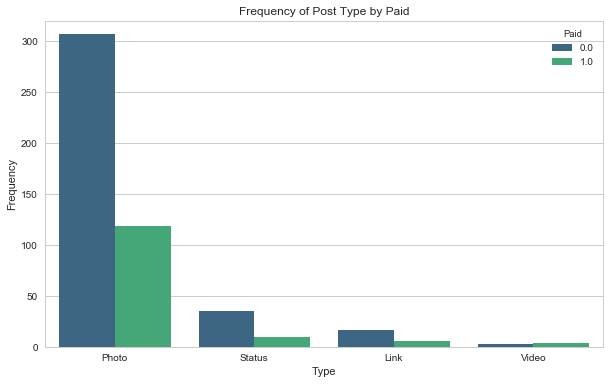

In [710]:
plt.figure(figsize=(10,6))
sns.countplot(x='Type',hue='Paid',data=df,palette='viridis')
plt.ylim(0,320)
#sns.despine(offset=4,bottom=True)
plt.title("Frequency of Post Type by Paid")
plt.ylabel("Frequency")
plt.savefig('typePaidCount.png', bbox_inches='tight')

Video posts had the highest mean, median, and percentiles. Photo posts had the largest range, from 0 to 6000.

Take-aways:

- On average video posts had higher engagement
- Photo posts had the largest range
- This suggests that total interactions can depend on the photo posted
- Links performed the worst, with the lowest mean, range, and median
- Status on average performed 2nd best in terms on mean engagement, with the second largest range. 
- No difference in paid link posts
- Paid Status Posts had higher likes on average when compared to non-paid status posts
    - Possibly due to how well status updates integrate in newsfeed
- Paid Photo Posts performed marginally better than non-paid posts on average, though non-paid posts had a larger range (more outliers)

#### Paid Posts vs. Likes

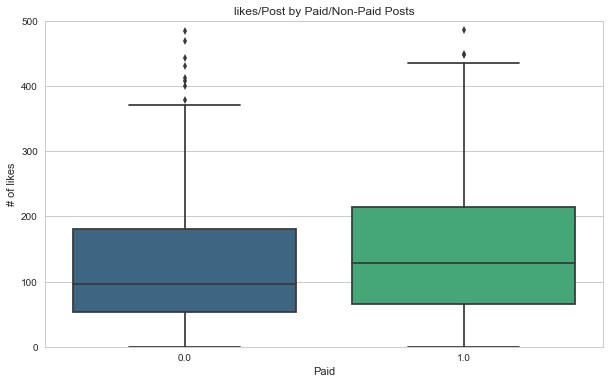

In [721]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Paid',y='like',data=df,palette='viridis')
plt.ylim(0,500)
#sns.despine(offset=4,bottom=True)
plt.title("likes/Post by Paid/Non-Paid Posts")
plt.ylabel("# of likes")
plt.savefig('paidBox.png', bbox_inches='tight')

In [850]:
from numpy import median
print(median(df[df['Paid']==0]['like']))
print(median(df[df['Paid']==1]['like']))

96.0
128.0


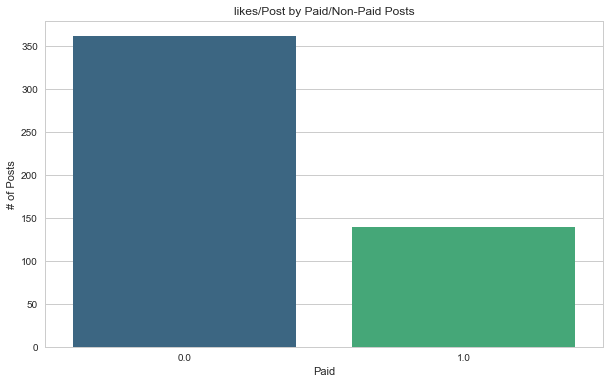

In [720]:
plt.figure(figsize=(10,6))
sns.countplot(x='Paid',data=df,palette='viridis')
#sns.despine(offset=4,bottom=True)
plt.title("likes/Post by Paid/Non-Paid Posts")
plt.ylabel("# of Posts")
plt.savefig('paidCount.png', bbox_inches='tight')

Observations:
- There were more non-paid posts than paid posts
- Paid posts performed 30 likes by median better than non-paid posts

#### Which days and hours performed the best?

In [490]:
df.columns

Index([u'Page total likes', u'Type', u'Category', u'Post Month',
       u'Post Weekday', u'Post Hour', u'Paid', u'comment', u'like', u'share',
       u'Total Interactions', u'Video', u'Status', u'Photo', u'Cat_1',
       u'Cat_2'],
      dtype='object')

In [523]:
timePivot = pd.pivot_table(df,aggfunc='median',
                           columns='Post Hour',
                           index='Post Weekday',
                           values='like')
timePivot = timePivot[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

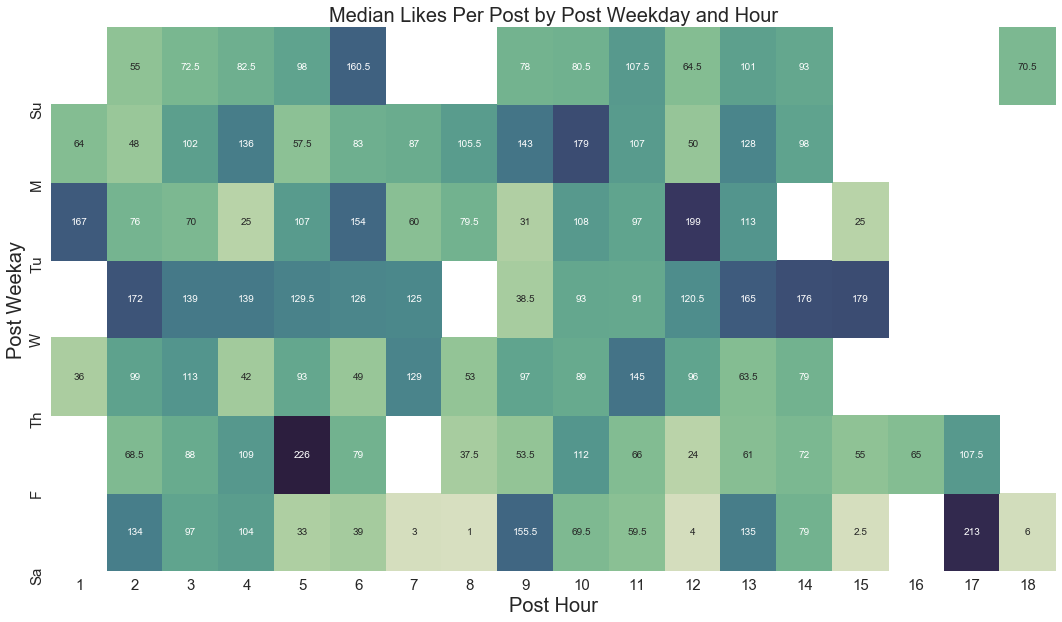

In [736]:
plt.figure(figsize=(18,10))
cmap= sns.cubehelix_palette(8, start=.5, rot=-.75,as_cmap=True)
sns.heatmap(timePivot,cbar=False,cmap=cmap,annot=True, fmt='g')
#plt.pcolor(lnch_pivot,cmap=plt.cm.Blues, alpha=0.8)
plt.yticks(np.arange(7),['Sa','F','Th','W','Tu','M','Su'],fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Post Weekay',fontsize=20)
plt.xlabel('Post Hour',fontsize=20)
plt.title('Median Likes Per Post by Post Weekday and Hour',fontsize=20)
plt.savefig('medianLikeHeatmap.png', bbox_inches='tight')

# Modeling: Can we predict the number of likes a post will get?

In [8]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

### Removing Outliers and Binarizing Categorical Variables

To remove the decent amount of outliers, I will remove nay variables that are above the 90th percentile.

After, I will span the categorical columns out into binary features. To avoid multicolinearity, I will be taking n-1 columns for each feature.

#### Removing Outliers

In [6]:
outlierCut = np.percentile(df['like'],90)
outlierCut

330.10000000000002

In [7]:
df = df[df['like']<outlierCut]

The function below will translate the weekdays to their labels, rather than 1-7.

In [9]:
def Weekday(x):
    if x == 1:
        return 'Su'
    elif x== 2:
        return 'Mo'
    elif x == 3:
        return 'Tu'
    elif x == 4:
        return 'We'
    elif x == 5:
        return 'Th'
    elif x ==6:
        return 'Fr'
    elif x == 7:
        return "Sa"

df['Weekday'] = df['Post Weekday'].apply(lambda x: Weekday(x))

#### Spanning out categorical columns

In [10]:
dayDf = pd.get_dummies(df['Weekday'])

In [11]:
df = pd.concat([df,dayDf],axis=1)

In [12]:
hours = list(range(0,18))
#hours
for i in hours:
    hours[i] = str(hours[i])
    hours[i]='hr_'+ hours[i]
    #print str(hours[i])

In [13]:
hourDf = pd.get_dummies(df['Post Hour'],prefix='hr_')
df = pd.concat([df,hourDf],axis=1)
monthDf = pd.get_dummies(df['Post Month'],prefix='Mo')
df = pd.concat([df,monthDf],axis=1)
df['Video'] = pd.get_dummies(df['Type'])['Video']
df['Status'] = pd.get_dummies(df['Type'])['Status']
df['Photo'] = pd.get_dummies(df['Type'])['Photo']
df['Cat_1'] = pd.get_dummies(df['Category'])[1]
df['Cat_2'] = pd.get_dummies(df['Category'])[2]
#To avoid multicollinearity with the post types I am not including Links.

In [14]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,...,Mo_8,Mo_9,Mo_10,Mo_11,Mo_12,Video,Status,Photo,Cat_1,Cat_2
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,...,0,0,0,0,1,0,0,1,0,1
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,...,0,0,0,0,1,0,1,0,0,1
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,...,0,0,0,0,1,0,0,1,0,0
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,...,0,0,0,0,1,0,0,1,0,1
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,...,0,0,0,0,1,0,0,1,0,1


### Train Test Split

In [15]:
#
x = df[['Page total likes','Paid','Video','Status','Photo',
    'Cat_1','Cat_2','Mo','Tu','Sa',"We",'Th','Fr',
       'hr__17','hr__1','hr__2','hr__3','hr__4','hr__5', 'hr__6','hr__7','hr__8',
        'hr__9','hr__10','hr__11','hr__12','hr__13','hr__14','hr__15','hr__16','Mo_1',
       'Mo_2','Mo_12','Mo_4','Mo_5','Mo_6','Mo_7','Mo_8','Mo_9','Mo_11','Mo_10']]
y = df['like']

The train test split will be with a test size of 0.3, and a random state of 50. With 500 samples a 30% split should not lead to overfitting.

In [16]:
x_train,x_test,y_train, y_test = train_test_split(x,
                                                  y, test_size=0.1,
                                                  random_state=42)

In [17]:
y_test.count()

50

In [18]:
x_test.columns

Index([u'Page total likes', u'Paid', u'Video', u'Status', u'Photo', u'Cat_1',
       u'Cat_2', u'Mo', u'Tu', u'Sa', u'We', u'Th', u'Fr', u'hr__17', u'hr__1',
       u'hr__2', u'hr__3', u'hr__4', u'hr__5', u'hr__6', u'hr__7', u'hr__8',
       u'hr__9', u'hr__10', u'hr__11', u'hr__12', u'hr__13', u'hr__14',
       u'hr__15', u'hr__16', u'Mo_1', u'Mo_2', u'Mo_12', u'Mo_4', u'Mo_5',
       u'Mo_6', u'Mo_7', u'Mo_8', u'Mo_9', u'Mo_11', u'Mo_10'],
      dtype='object')

## Linear and Lasso Regression

In [20]:
reg = linear_model.LinearRegression(normalize=True)
lasso = linear_model.Lasso(normalize=True)
reg.fit(x_train,y_train)
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [21]:
reg.coef_

array([  1.34914696e-02,   6.75973028e+01,   1.03332565e+02,
         1.52291213e+01,   4.16422561e+01,  -8.37494900e+01,
        -2.45355283e+01,  -5.49602040e+01,   2.28616762e+01,
        -9.40413182e+01,  -3.61694842e+01,  -4.21830055e+01,
        -5.82335606e+01,   1.78264974e+02,  -1.71968886e+01,
        -1.91943455e+00,   1.98051523e+01,  -3.85992229e+00,
         4.00480242e+02,  -8.09779829e+00,  -3.74563671e+01,
        -7.19084877e+01,  -2.30154165e+01,   7.08546648e+01,
        -3.17929722e+01,   2.56306438e+01,   5.54397700e+01,
         1.63793523e+02,   1.78423586e+01,   8.87908390e-14,
         2.79184527e+02,   2.16715932e+02,  -3.99393906e+02,
        -5.21359759e+01,  -9.83820752e+01,  -2.84032713e+02,
        -2.34626855e+02,  -3.23320344e+02,  -3.15195609e+02,
        -3.92223835e+02,  -3.80306626e+02])

In [22]:
lasso.coef_

array([   0.        ,   28.39789747,    0.        ,   -0.        ,
          0.        ,  -48.92957062,    0.        ,   -0.        ,
         15.54410522,   -2.62262774,    0.        ,   -0.        ,
         -0.        ,    0.        ,   -0.        ,   -0.        ,
         -0.        ,   -0.        ,  253.05635563,   -0.        ,
         -0.        ,   -0.        ,   -0.        ,    3.71844117,
         -0.        ,   -0.        ,    0.        ,    0.        ,
         -0.        ,    0.        ,   -0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,   -0.        ,
         11.36245645,    0.        ,    0.        ,    0.        ,   -0.        ])

#### Model Validation

In [23]:
pred = reg.predict(x_test)
pred_train = reg.predict(x_train)

lpred = lasso.predict(x_test)
lpred_train = lasso.predict(x_train)

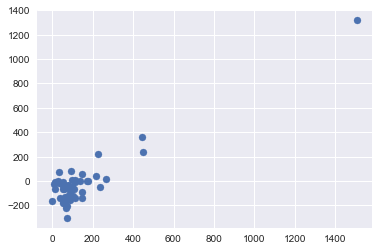

In [28]:
LRerror = y_test - pred
plt.scatter(y_test, LRerror)
#plt.ylim(-400,400)
#plt.xlim(0,450)

(0, 450)

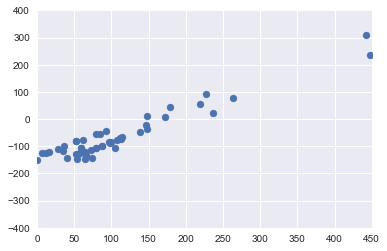

In [32]:
LSerror = y_test - lpred
plt.scatter(y_test, LSerror)
plt.ylim(-400,400)
plt.xlim(0,450)

In [51]:
testScore = r2_score(y_pred=pred,y_true=y_test)
trainScore = r2_score(y_pred=pred_train,y_true=y_train)

ltestScore = r2_score(y_pred=lpred,y_true=y_test)
ltrainScore = r2_score(y_pred=lpred_train,y_true=y_train)

In [52]:
lrResults = pd.DataFrame()
lrResults['Score'] = [trainScore,testScore]
lrResults['Step'] = ['train','test']

lrResults

,Score,Step
0,0.207322,train
1,0.154473,test


In [53]:
lassoResults = pd.DataFrame()
lassoResults['Score'] = [ltrainScore,ltestScore]
lassoResults['Step'] = ['train','test']

lassoResults

,Score,Step
0,0.122903,train
1,0.085031,test


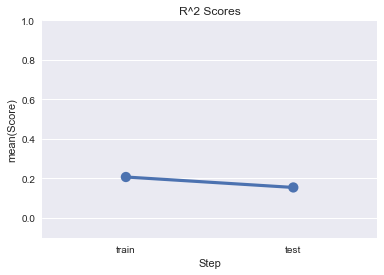

In [34]:
sns.pointplot(y=lrResults['Score'],x=lrResults['Step'])
plt.ylim([-.1,1])
plt.title('R^2 Scores')
plt.savefig('LRScores.png',bbox_inches='tight')

The linear regression model performed poorly overall. 
- Slight overfitting: the R2 value fell .05 points from train to test
- Weak predictive power: .207 R2 train, .154 in test

I had to tune the test set to 10% of the total dataset, to get the highest R2 value in the test set.

#### Let's try a different approach- a Random Forest Regressor.

## Random Forest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor

As the Linear Regression train/test split was tuned for, I will set the split back to my preliminary value of 0.3

In [153]:
x_train,x_test,y_train, y_test = train_test_split(x,
                                                  y, test_size=0.4,
                                                  random_state=42)

For the Random Forest we will use a min samples split of 10, as to avoid overfitting.

In [170]:
rf = RandomForestRegressor(n_estimators=500,min_samples_split=10)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

#### Model Validation

In [171]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf.predict(x_train)
predicted_test = rf.predict(x_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

print('Test data R-2 score: {}').format(test_score)
print('Test data Spearman correlation: {}').format(spearman[0])
print('Test data Pearson correlation: {}').format(pearson[0])

train_score = r2_score(y_train, predicted_train)
spearmanTrain = spearmanr(y_train, predicted_train)
pearsonTrain = pearsonr(y_train, predicted_train)

print(' ')

print('Train data R-2 score: {}').format(train_score)
print('Train data Spearman correlation: {}').format(spearmanTrain[0])
print('Train data Pearson correlation: {}').format(pearsonTrain[0])

Test data R-2 score: 0.131753109439
Test data Spearman correlation: 0.398813691839
Test data Pearson correlation: 0.376914037366
 
Train data R-2 score: 0.61892366114
Train data Spearman correlation: 0.859328980587
Train data Pearson correlation: 0.833012895279


In [172]:
RFperf = pd.DataFrame()
RFperf['Score'] = [round(train_score,3),round(test_score,3)]
RFperf['Step'] = ['train','test']
RFperf

,Score,Step
0,0.619,train
1,0.132,test


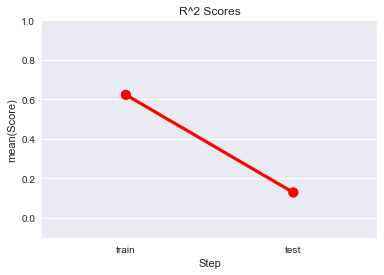

In [139]:
sns.pointplot(y=RFperf['Score'],x=RFperf['Step'],color='Red')
plt.ylim([-.1,1])
plt.title('R^2 Scores')
plt.savefig('RFScores.png',bbox_inches='tight')

Best results came from 
- RF parameters:
    - 500 estimators
    - 10 min sample split 
- Train/test split of 0.4

We had solid performance in the test set, with:
    - .623 R^2 value
    - .861 Spearman Correlation

But the model fell apart when using the test set, showing clear signs of overfitting:
    - .129 R^2 value
    - .398 Spearman Correlation

#### Feature Importance

In [152]:
predicted_test = rf.predict(x_test)

fI = pd.DataFrame()
fI['Variable'] = list(x_train.columns)
fI['Importance'] = rf.feature_importances_
fI.sort_values(by='Importance',ascending=False)[0:15]

,Variable,Importance
0,Page total likes,0.188888
5,Cat_1,0.123647
10,We,0.062571
40,Mo_10,0.057278
1,Paid,0.048075
9,Sa,0.037287
2,Video,0.031045
23,hr__10,0.029460
11,Th,0.027905
17,hr__4,0.026808


In [986]:
topVars= list(fI.sort_values(by='Importance',ascending=False)[0:15]['Variable'])
topVars

['Page total likes',
 'Cat_1',
 'Paid',
 'Mo_10',
 'hr__13',
 'Sa',
 'Mo_7',
 'Th',
 'hr__10',
 'hr__4',
 'Tu',
 'Fr',
 'Video',
 'Cat_2',
 'hr__1']

#### Can we improve the model by using only the top 15 features?

In [992]:
x = df[topVars]

In [993]:
x_train,x_test,y_train, y_test = train_test_split(x,
                                                  y, test_size=0.3,
                                                  random_state=50)

In [994]:
rf = RandomForestRegressor(n_estimators=500,min_samples_split=15)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=15, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [995]:
from sklearn.metrics import r2_score
from scipy.stats import spearmanr, pearsonr
predicted_train = rf.predict(x_train)
predicted_test = rf.predict(x_test)
test_score = r2_score(y_test, predicted_test)
spearman = spearmanr(y_test, predicted_test)
pearson = pearsonr(y_test, predicted_test)

#print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print('Test data R-2 score: {}').format(test_score)
print('Test data Spearman correlation: {}').format(spearman[0])
print('Test data Pearson correlation: {}').format(pearson[0])

train_score = r2_score(y_train, predicted_train)
spearmanTrain = spearmanr(y_train, predicted_train)
pearsonTrain = pearsonr(y_train, predicted_train)

print(' ')

#print(f'Out-of-bag R-2 score estimate: {rf.oob_score_:>5.3}')
print('Train data R-2 score: {}').format(train_score)
print('Train data Spearman correlation: {}').format(spearmanTrain[0])
print('Train data Pearson correlation: {}').format(pearsonTrain[0])

Test data R-2 score: 0.0735779002202
Test data Spearman correlation: 0.366331840555
Test data Pearson correlation: 0.30490941908
 
Train data R-2 score: 0.463470449251
Train data Spearman correlation: 0.709508194683
Train data Pearson correlation: 0.71481692673


The model performed substantially worse when taking the top 15 features by importance from the old model. 

### Modeling Conclusion

After iterating through a random forest using the most important variables and seeing no improvement, this suggests that the data here is not rich enough to sufficiently predict likes based only on the information here.  

## Takeaways

1. Paid posts on average have higher engagement 
2. Paid Status/Photo and Category 1 and 2 posts have the highest improvement so
    - more paid posts of these types
3. Video Posts have the highest average engagement, and its not close 
	- more Video posts
4. Posting Monday in the mid-morning and Wednesday in the early morning 
    - Identify and post during times of high engagement
5. Place importance on increasing Page Likes 
    - higher probability that a post has “high” engagement
Need a richer dataset to predict accurately
    - identify potentially useful data points and collect them



## References


(Moro et al., 2016) Moro, S., Rita, P., & Vala, B. (2016). Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach. Journal of Business Research, 69(9), 3341-3351. 
